<a href="https://colab.research.google.com/github/prajachintya/Course_IORS/blob/main/task2_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing libraries

In [ ]:
%pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [ ]:
import numpy as np
import os.path
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

In [ ]:
fname_img = "00091.tif"

In [ ]:
! gdown --id 12x-QvtQtLECx0Mfa_qqGO3mWXvwyU1Qm

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=12x-QvtQtLECx0Mfa_qqGO3mWXvwyU1Qm
To: /content/00091.tif
100% 263k/263k [00:00<00:00, 80.4MB/s]


In [ ]:
os.path.isfile(fname_img)

True

In [ ]:
img = rasterio.open(fname_img)

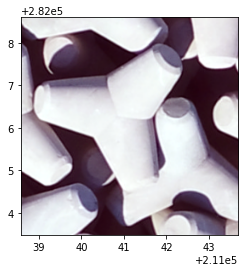

In [ ]:
show(img)

In [ ]:
type(img)

rasterio.io.DatasetReader

In [ ]:
I = img.read()

In [ ]:
I.shape

(4, 256, 256)

In [ ]:
type(I)

numpy.ndarray

In [ ]:
I = np.swapaxes(I, 0, 2)

In [ ]:
I.shape

(256, 256, 4)

In [ ]:
X = I.reshape((256*256, 4))

In [ ]:
X.shape

(65536, 4)

In [ ]:
I[0,1, :]

array([230, 226, 226, 255], dtype=uint8)

In [ ]:
X[1, :]

array([230, 226, 226, 255], dtype=uint8)

In [ ]:
I[1, 0, :]

array([231, 228, 226, 255], dtype=uint8)

In [ ]:
X[3000, :]

array([253, 255, 255, 255], dtype=uint8)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [ ]:
print(pca.components_)

[[-0.52953959 -0.62271609 -0.57603168 -0.        ]
 [-0.54715033 -0.26818419  0.79290842  0.        ]
 [ 0.64823941 -0.73505232  0.19870517 -0.        ]]


In [ ]:
x1 = pca.components_[:,0]
x2 = pca.components_[:,1]
np.dot(x1, x1)

1.0

In [ ]:
np.dot(x1, x2)

2.220446049250313e-16

In [ ]:
print(pca.explained_variance_)

[2.32104342e+04 3.81358408e+01 6.18406582e+00]


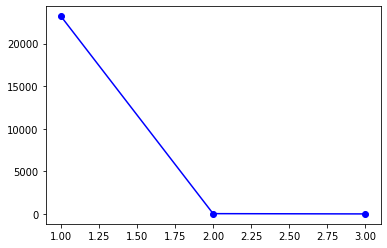

In [ ]:
plt.plot(np.arange(3)+1, pca.explained_variance_, 'bo-')

In [ ]:
X_pca = pca.transform(X)

In [ ]:
X_pca.shape

(65536, 3)

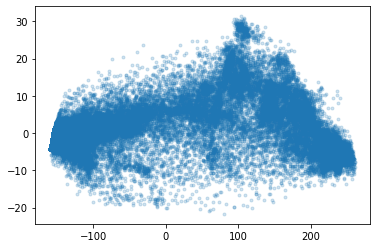

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', alpha=0.2)

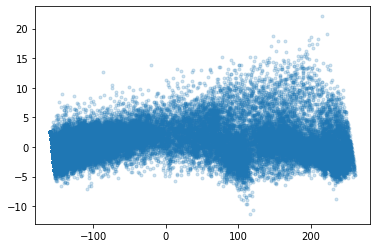

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 2], marker='.', alpha=0.2)

In [ ]:
I_pca = X_pca.reshape(256, 256, 3)

In [ ]:
I_pca = np.swapaxes(I_pca, 0, 1)

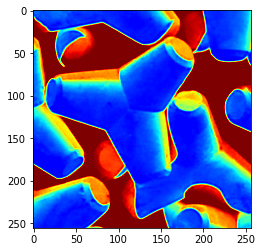

In [ ]:
plt.imshow(I_pca[:,:,0], cmap='jet', vmin=-200, vmax=200)
plt.show()

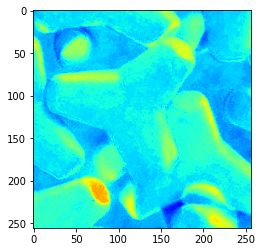

In [ ]:
plt.imshow(I_pca[:,:,1], cmap='jet', vmin=-30, vmax=50)
plt.show()

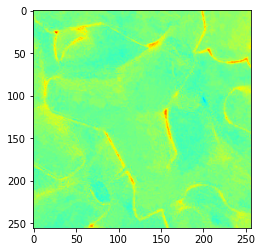

In [ ]:
plt.imshow(I_pca[:,:,2], cmap='jet', vmin=-30, vmax=30)
plt.show()

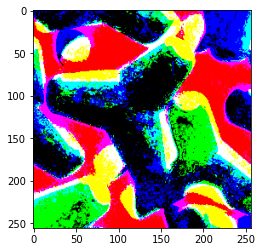

In [ ]:
plt.imshow(I_pca)
plt.show()